In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Utils, plotting

In [11]:
def read_dataset(path):
    df = pd.read_csv(path)
    return df

def plot(title, x1, y1, label1 = None, title1 = None, 
         x2 = None, 
         y2 = None, 
         label2 = None, 
         title2 = None,
         mode1 = 'yo',
         mode2 = 'g^'):
    
    plt.plot(x1, y1, mode1, label = label1 if label1 is not None else '')
    if x2 is not None and y2 is not None:
        plt.plot(x2, y2, mode2, label = label2 if label2 is not None else '')
        
    plt.title(title)
    plt.xlabel(title1 if title1 is not None else '')
    plt.ylabel(title2 if title2 is not None else '')
    
    plt.legend()
    plt.show()
    
def plot3d(title, x1, y1, z1, x2 = None, y2 = None, z2 = None, label1 = None, label2 = None,
           xtitle=None, ytitle=None, ztitle=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, y1, z1, c='red', label=label1 if label1 is not None else '')
    if x2 is not None and y2 is not None and z2 is not None:
        ax.scatter(x2, y2, z2, c='blue', marker='^',label=label2 if label2 is not None else '')
    ax.set_xlabel(xtitle if xtitle is not None else '')
    ax.set_ylabel(ytitle if ytitle is not None else '')
    ax.set_zlabel(ztitle if ztitle is not None else '')
    ax.set_title(title)
    ax.legend()
    plt.show()

# source: github.com/lauradiosan    
def normalisation(trainData, testData):
    scaler = StandardScaler()

    if isinstance(trainData[0], (float, float)):
        trainData = [[x] for x in trainData]
        testData = [[x] for x in testData]
        one_d = True
    else:
        one_d = False

    scaler.fit(trainData)
    train_scaled = scaler.transform(trainData)
    test_scaled = scaler.transform(testData)

    if one_d:
        train_scaled = [x[0] for x in train_scaled]
        test_scaled = [x[0] for x in test_scaled]

    return train_scaled, test_scaled

# Predict happiness based on GDP

C:\Users\Alex\AppData\Local\Temp\ipykernel_15180\2053703160.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


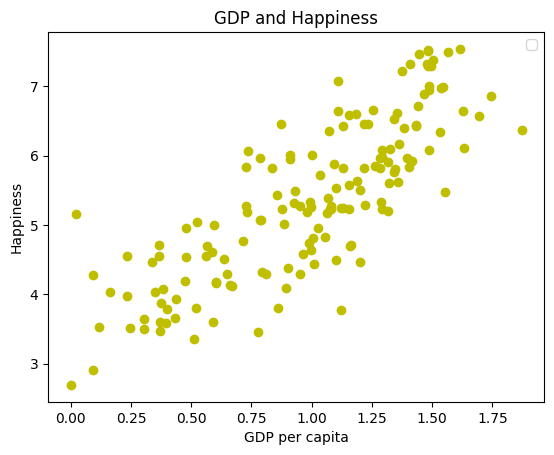

In [12]:
dataset = read_dataset('./data/2017.csv')
dataset = dataset.dropna()

input_col = dataset['Economy..GDP.per.Capita.']
output_col = dataset['Happiness.Score']

plot('GDP and Happiness', input_col, output_col, title1='GDP per capita', title2='Happiness')

# Train and test split

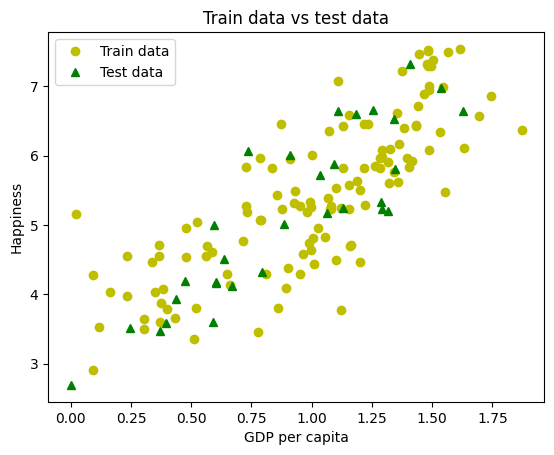

In [13]:
x_train, x_test, y_train, y_test = train_test_split(input_col, output_col, test_size = 0.2, random_state=21)

plot('Train data vs test data', x_train, y_train, title1='GDP per capita', title2='Happiness', x2=x_test,y2=y_test,
         label1='Train data', label2='Test data')

# Training model

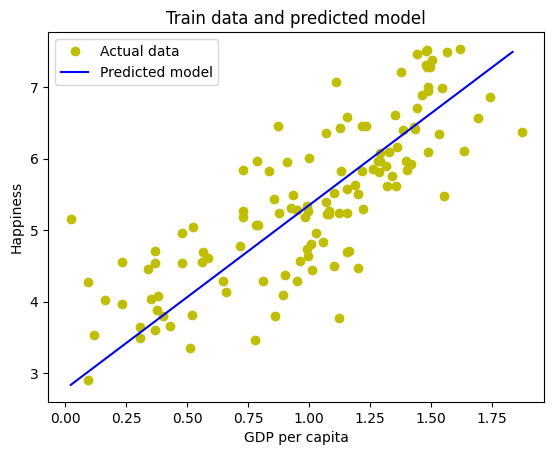

Learnt model: f(x) = 2.774473046315952 + 2.574814309277694*x


In [14]:
regressor = SGDRegressor()
regressor.fit([[x] for x in x_train], y_train)
w0 = regressor.intercept_[0]
w1 = regressor.coef_[0]

x_model = []
val = min(x_train)
step = (max(x_train) - min(x_train)) / 100
for i in range(1, 100):
    x_model.append(val)
    val += step
y_model = [w0 + w1 * el for el in x_model] 

plot('Train data and predicted model', x_train, y_train, title1 = 'GDP per capita', title2 = 'Happiness',
    x2=x_model, y2=y_model, mode2='b-', label1='Actual data', label2='Predicted model')

print(f'Learnt model: f(x) = {w0} + {w1}*x')

# Test sample predictions

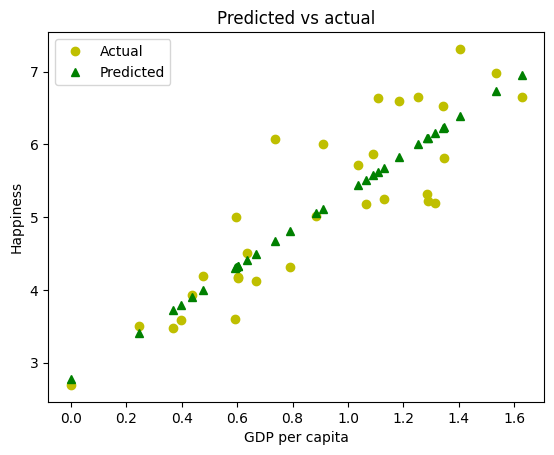

In [15]:
y_predict = regressor.predict([[x] for x in x_test])
plot('Predicted vs actual', x_test, y_test, title1='GDP per capita', title2='Happiness', x2=x_test,y2=y_predict,
         label1='Actual', label2='Predicted')

# Performance metrics

In [16]:
print(f'Mse: {mean_squared_error(y_test, y_predict)}')

Mse: 0.33453752307220935


# Predict happiness based on GDP and freedom

C:\Users\Alex\AppData\Local\Temp\ipykernel_15180\2053703160.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


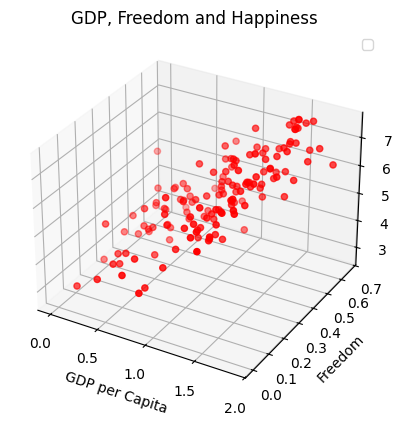

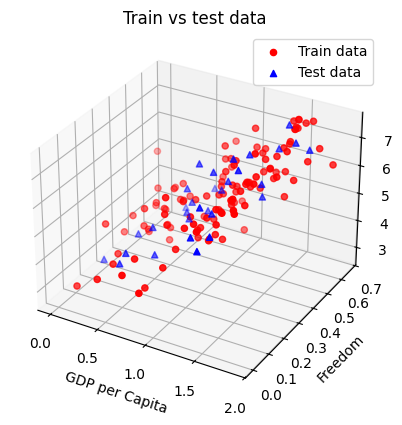

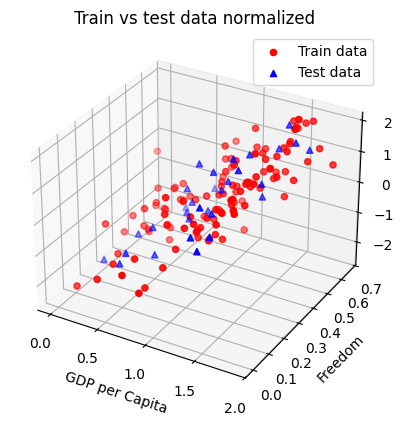

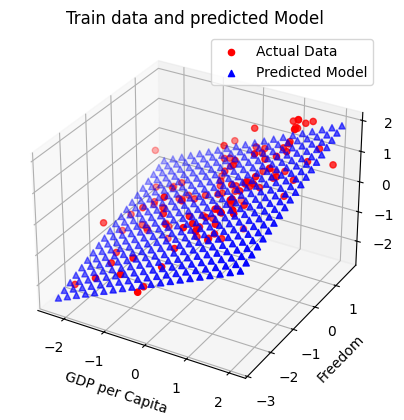

[[-1.35110779 -1.66573498]
 [ 0.42833712  0.56228849]
 [ 0.14088199 -0.56865682]
 [-0.97438171  0.29684026]
 [ 0.81318022  0.40590311]
 [-0.95812072  0.24829796]
 [-1.44817676 -1.76822031]
 [-0.87868828  0.3415118 ]
 [-1.81178614 -0.41652418]
 [ 0.67644137 -2.11251574]
 [-0.96117779  1.4936463 ]
 [ 0.0709868   0.26370261]
 [-1.26022251 -0.6980563 ]
 [-2.39411363 -0.93798905]
 [-0.80530369  0.08276162]
 [ 0.73760974  0.58875628]
 [ 0.58904372 -0.22665453]
 [ 1.47856978  1.32575801]
 [ 0.9531835   1.3641029 ]
 [-0.98518443 -1.08138062]
 [ 0.20585725 -1.18955593]
 [ 0.24273938  0.17953138]
 [-0.2857413   0.60936377]
 [ 0.29293074 -1.72170704]
 [ 0.80453288  1.19444034]
 [ 0.66816533 -1.5750418 ]
 [-0.63844109  0.24726271]
 [ 1.26274367  1.08942555]
 [-0.22771545  0.14598654]
 [-1.51604807  1.14800413]
 [-0.50765955  0.39774283]]
Learnt model: f(x) = -0.0009513971667913932 + 0.6209155853654137*x1 + 0.3808236952118485*x2
Mse: 0.3506676044492189


In [18]:
dataset = read_dataset('./data/2017.csv')
dataset = dataset.dropna(subset = ['Economy..GDP.per.Capita.', 'Freedom'])

input_col1 = dataset['Economy..GDP.per.Capita.']
input_col2 = dataset['Freedom']
output_col = dataset['Happiness.Score']

plot3d('GDP, Freedom and Happiness', input_col1, input_col2, output_col, 
       xtitle='GDP per Capita', 
       ytitle='Freedom', 
       ztitle='Happiness')


x_train, x_test, y_train, y_test = train_test_split(list(zip(input_col1, input_col2)), output_col, test_size = 0.2, random_state=21)

x_train_gdp, x_train_freedom = zip(*x_train)
x_test_gdp, x_test_freedom = zip(*x_test)

plot3d('Train vs test data', x_train_gdp, x_train_freedom, y_train, 
       xtitle='GDP per Capita', 
       ytitle='Freedom', 
       ztitle='Happiness', 
       x2=x_test_gdp, 
       y2=x_test_freedom, 
       z2=y_test, 
       label1='Train data', 
       label2='Test data')
    
x_train, x_test = normalisation(x_train, x_test)
y_train, y_test = normalisation(y_train, y_test)

plot3d('Train vs test data normalized', x_train_gdp, x_train_freedom, y_train, 
       xtitle='GDP per Capita', 
       ytitle='Freedom', 
       ztitle='Happiness', 
       x2=x_test_gdp, 
       y2=x_test_freedom, 
       z2=y_test, 
       label1='Train data', 
       label2='Test data')


regressor = SGDRegressor()
regressor.fit(x_train, y_train)
w0, w1, w2 = regressor.intercept_[0], regressor.coef_[0], regressor.coef_[1]

x_vals, y_vals = zip(*x_train)
x_range = np.linspace(min(x_vals), max(x_vals), 20)
y_range = np.linspace(min(y_vals), max(y_vals), 20)
x_grid, y_grid = np.meshgrid(x_range, y_range)

z_grid = w0 + w1 * x_grid + w2 * y_grid

x_model = x_grid.flatten()
y_model = y_grid.flatten()
z_model = z_grid.flatten()

x_train_gdp, x_train_freedom = zip(*x_train)

plot3d('Train data and predicted Model', x_train_gdp, x_train_freedom, y_train,
        xtitle='GDP per Capita',
        ytitle='Freedom',
        ztitle='Happiness',
        x2=x_model,
        y2=y_model,
        z2=z_model,
        label1='Actual Data',
        label2='Predicted Model')

print(f'Learnt model: f(x) = {w0} + {w1}*x1 + {w2}*x2')
print(f'Mse: {mean_squared_error([[y] for y in y_test], regressor.predict(x_test))}')
